In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

def plotGraph(dim,error,k_2,k_inf):   
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(dim, error, '-', color='red')
    plt.title("Relative Error")
    plt.xlabel('dimension')
    plt.ylabel('error')
    plt.yscale("log")
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(dim, k_2,"-", color='red')
    plt.plot(dim, k_inf,"-", color='blue')
    plt.title("k_inf and k_2")
    plt.xlabel('dimension')
    plt.ylabel('k')
    plt.legend(['k_2', 'k_inf'])
    plt.grid()
    plt.yscale("log")

    plt.show()
     
def k_analisys(A):
      k_2=np.linalg.cond(A,2)
      k_inf=np.linalg.cond(A,np.inf)
      return (k_2,k_inf)
  
def analysis(dim,vMtrx):
    N=dim.size
    r_err=np.zeros(N)
    k_2=np.zeros(N)
    k_inf=np.zeros(N)
    for i in range(N):
        A=vMtrx[i]
        x=np.ones((dim[i],))
        b=A@x
        k_2[i]=k_analisys(A)[0]    
        k_inf[i]=k_analisys(A)[1]
        x_real=np.linalg.solve(A,b)
        r_err[i]=(np.linalg.norm((x_real-x),2) / np.linalg.norm(x,2))
    plotGraph(dim,r_err,k_2,k_inf)  

def vecMatricx(dim,var="rand"):
    listofv=[]
    if(var=="rand"):
        for i in range(dim.size):
            A=np.random.rand(dim[i],dim[i])
            listofv.append(A)
    elif(var=="Vand"):
        for i in range(dim.size):
            x=np.linspace(1,dim[i],dim[i])
            A=np.vander(x,dim[i])
            listofv.append(A)    
    else:
        for i in range(dim.size):
            A=scp.linalg.hilbert(dim[i])
            listofv.append(A)
    return listofv

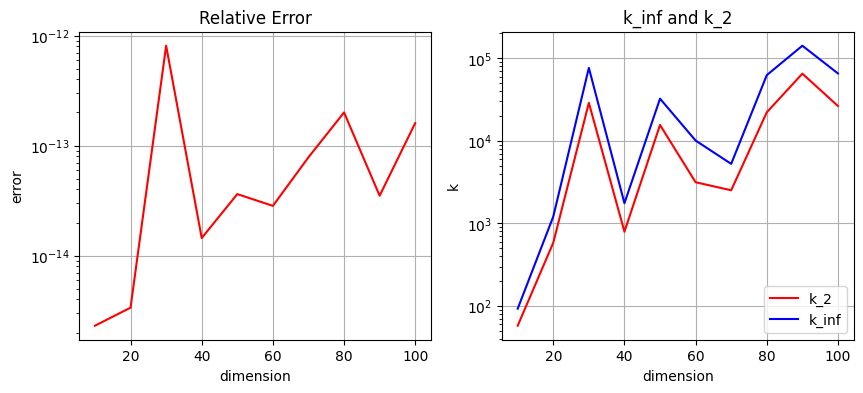

In [27]:
dim1=np.linspace(10,100,10,dtype=int)
analysis(dim1,vecMatricx(dim1,"rand"))


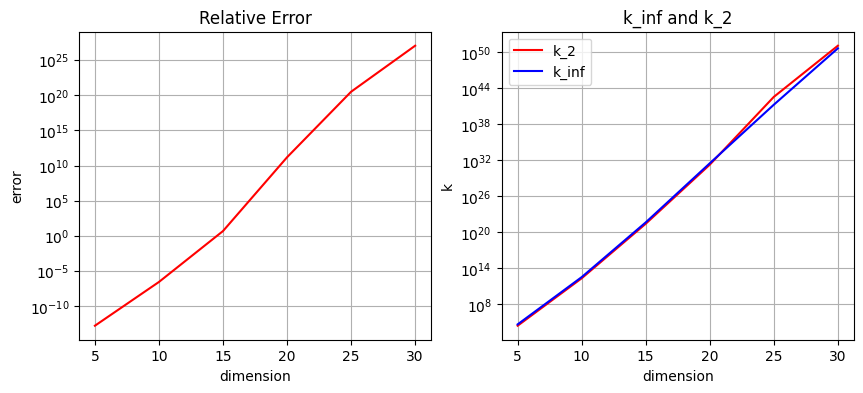

In [28]:

dim2=np.linspace(5,30,6,dtype=int)
analysis(dim2,vecMatricx(dim2,"Vand"))


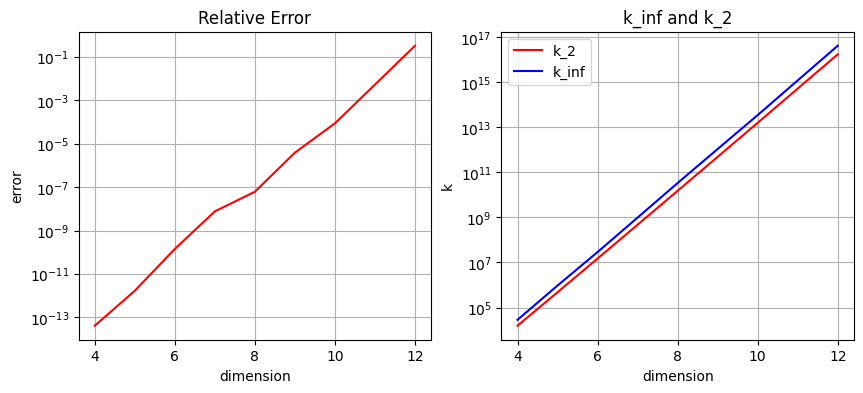

In [29]:

dim3=np.linspace(4,12,8,dtype=int)
analysis(dim3,vecMatricx(dim3,"Hilbert"))

# Second Exercize
### Calculate the machine epsilon as the smallest epsilon that fl(1+epsilon)>1==1

In [2]:
var=1.
epsilon=1.
i=1
e=0
while (1+epsilon)>1:
    e=epsilon
    epsilon=float((var/2.))
    var=float(epsilon)
print(e)   
print((1+float(1.111e-16))>1)

### Another way to compute the machine epsilon is:
print(7./3-4./3-1)

    
    

2.220446049250313e-16
True
2.220446049250313e-16


### Calculate the value of e=2.7....

In [29]:
import numpy as np


n=1e20
a_n=(1.+1./n)**n 
print(a_n)
print(np.e)

1.0
2.718281828459045


The error propagates cause of the truncation of the number and at some points the 1/n is only zero and so 1^n=1.

# Third Exercize


In [32]:
import numpy as np
A=np.array([[4,2],[1,3]])
B=np.array([[4,2],[2,1]])
print("A is a full rank matrix. The rank of A is:")
print(np.linalg.matrix_rank(A))
print("B isn't a full rank matrix cause her rank is:")
print(np.linalg.matrix_rank(B))
print(np.linalg.eigvals(A))
print(np.linalg.eigvals(B))



A is a full rank matrix. The rank of A is:
2
B isn't a full rank matrix cause her rank is:
1
[5. 2.]
[5. 0.]


The rank of a matrix is the number of vectorso of line or of columns that are linearly independet. When you diagonalize a matrix you aren't changig the vectors but only their rapresentation on the vectorial space. So if you obtain an eigen value that is 0, this vector is linearly dependent to the others.